In [157]:
from sqlalchemy import create_engine, Column, Integer, String, Boolean, Float, ForeignKey, Date, select
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import sessionmaker
import sqlalchemy as db
import pandas as pd
Base = declarative_base()

In [4]:
engine = db.create_engine('sqlite:///mydb.db')
conn = engine.connect()
metadata = db.MetaData()

In [19]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)
Session = sessionmaker(bind=engine)
session = Session()

In [67]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [21]:
# Таблица страны
country = db.Table(
    'Country', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('country_name', db.String),
    extend_existing=True
)

# Таблица региона
region = db.Table(
    'Region', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('region_name', db.String),
    db.Column('country_id', db.Integer, db.ForeignKey('Country.id')),
    extend_existing=True
)

# Таблица города
city = db.Table(
    'City', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('city_name', db.String),
    db.Column('region_id', db.Integer, db.ForeignKey('Region.id')),
    extend_existing=True
)

# Таблица местоположения
location = db.Table(
    'Location', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('latitude', db.Float),
    db.Column('longitude', db.Float),
    db.Column('city_id', db.Integer, db.ForeignKey('City.id')),
    extend_existing=True
)

# Таблица типа атаки
attacktypes = db.Table(
    'AttackTypes', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('AttackTypes_name', db.String),
    extend_existing=True
)

random_table = db.Table(
    'Random', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('random_value', db.Float),
    extend_existing=True
)

# Таблица применяемого оружия
weapon = db.Table(
    'Weapon', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('weapon_name', db.String),
    extend_existing=True
)

# Таблица террористов
group = db.Table(
    'Group', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('group_name', db.String),
    extend_existing=True
)

# Таблица целей
targets = db.Table(
    'Targets', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('Targets_name', db.String),
    extend_existing=True
)

# Таблица потерь и ущербов
causalitiesdamage = db.Table(
    'CausalitiesDamage', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('casualties', db.Integer),
    db.Column('damage', db.Integer),
    extend_existing=True
)

# Таблица инцидентов
incidents = db.Table(
    'Incidents', metadata,
    db.Column('id', db.Integer, primary_key=True),
    db.Column('date', db.String),
    db.Column('time', db.String),
    db.Column('location_id', db.Integer, db.ForeignKey('Location.id')),
    db.Column('AttackTypes_id', db.Integer, db.ForeignKey('AttackTypes.id')),
    db.Column('random_id', db.Integer, db.ForeignKey('Random.id')),
    db.Column('weapon_id', db.Integer, db.ForeignKey('Weapon.id')),
    db.Column('group_id', db.Integer, db.ForeignKey('Group.id')),
    db.Column('Targets_id', db.Integer, db.ForeignKey('Targets.id')),
    db.Column('causalitiesdamage_id', db.Integer, db.ForeignKey('CausalitiesDamage.id')),
    extend_existing=True
)

In [61]:
# Создание таблицы в базе данных
metadata.create_all(engine)

In [23]:
# Извлечение ключей 
columns = location.columns.keys()
print(columns)

['id', 'latitude', 'longitude', 'city_id']


Location

In [51]:
new_d = df[['latitude', 'longitude']].drop_duplicates()
new_d.shape

(49064, 2)

In [53]:
uni_data = new_d.values.tolist()
uni_data

[[18.456792, -69.951164],
 [19.371887, -99.086624],
 [15.478598, 120.599741],
 [37.99749, 23.762728],
 [33.580412, 130.396361],
 [37.005105, -89.176269],
 [-34.891151, -56.187214],
 [37.791927, -122.225906],
 [43.076592, -89.412488],
 [43.07295, -89.386694],
 [43.4685, -89.744299],
 [39.758968, -104.876305],
 [41.890961, 12.490069],
 [42.331685, -83.047924],
 [18.386932, -66.061127],
 [52.50153, 13.401851],
 [nan, nan],
 [40.697132, -73.931351],
 [18.379998, -65.830948],
 [47.610786, -122.331306],
 [40.116748, -88.23927],
 [40.717892, -74.067467],
 [14.622869, -90.529068],
 [14.67428, 121.057495],
 [10.482834, -66.962128],
 [42.47031, -96.413949],
 [33.60651, -88.650419],
 [41.241996, -82.615241],
 [42.479999, -96.413046],
 [42.46634, -96.41405],
 [25.720851, -80.277857],
 [15.675051, 120.331618],
 [45.511795, -122.675629],
 [41.084195, -81.514059],
 [18.460791, -66.264884],
 [18.441963, -66.026316],
 [42.3505, -71.105399],
 [42.838355, -88.743224],
 [39.07859, -84.179414],
 [48.139126

In [181]:
[
                {'id': i, 'latitude': uni_data[i][0], 'longitude': uni_data[i][1], 'longitude': uni_data[i][1]} for i in range(len(uni_data))
    ]

[{'id': 0, 'latitude': 18.456792, 'longitude': -69.951164},
 {'id': 1, 'latitude': 19.371887, 'longitude': -99.086624},
 {'id': 2, 'latitude': 15.478598, 'longitude': 120.599741},
 {'id': 3, 'latitude': 37.99749, 'longitude': 23.762728},
 {'id': 4, 'latitude': 33.580412, 'longitude': 130.396361},
 {'id': 5, 'latitude': 37.005105, 'longitude': -89.176269},
 {'id': 6, 'latitude': -34.891151, 'longitude': -56.187214},
 {'id': 7, 'latitude': 37.791927, 'longitude': -122.225906},
 {'id': 8, 'latitude': 43.076592, 'longitude': -89.412488},
 {'id': 9, 'latitude': 43.07295, 'longitude': -89.386694},
 {'id': 10, 'latitude': 43.4685, 'longitude': -89.744299},
 {'id': 11, 'latitude': 39.758968, 'longitude': -104.876305},
 {'id': 12, 'latitude': 41.890961, 'longitude': 12.490069},
 {'id': 13, 'latitude': 42.331685, 'longitude': -83.047924},
 {'id': 14, 'latitude': 18.386932, 'longitude': -66.061127},
 {'id': 15, 'latitude': 52.50153, 'longitude': 13.401851},
 {'id': 16, 'latitude': nan, 'longitude

Country

In [77]:
country_uni= df[['country', 'country_txt']].drop_duplicates()
country_uni.shape

(205, 2)

In [81]:
country_lst = country_uni.values.tolist()
country_lst

[[58, 'Dominican Republic'],
 [130, 'Mexico'],
 [160, 'Philippines'],
 [78, 'Greece'],
 [101, 'Japan'],
 [217, 'United States'],
 [218, 'Uruguay'],
 [98, 'Italy'],
 [499, 'East Germany (GDR)'],
 [65, 'Ethiopia'],
 [83, 'Guatemala'],
 [222, 'Venezuela'],
 [362, 'West Germany (FRG)'],
 [199, 'Switzerland'],
 [102, 'Jordan'],
 [185, 'Spain'],
 [30, 'Brazil'],
 [60, 'Egypt'],
 [11, 'Argentina'],
 [110, 'Lebanon'],
 [96, 'Ireland'],
 [209, 'Turkey'],
 [158, 'Paraguay'],
 [94, 'Iran'],
 [603, 'United Kingdom'],
 [45, 'Colombia'],
 [26, 'Bolivia'],
 [145, 'Nicaragua'],
 [142, 'Netherlands'],
 [21, 'Belgium'],
 [38, 'Canada'],
 [14, 'Australia'],
 [153, 'Pakistan'],
 [230, 'Zambia'],
 [198, 'Sweden'],
 [49, 'Costa Rica'],
 [406, 'South Yemen'],
 [36, 'Cambodia'],
 [97, 'Israel'],
 [161, 'Poland'],
 [201, 'Taiwan'],
 [156, 'Panama'],
 [106, 'Kuwait'],
 [155, 'West Bank and Gaza Strip'],
 [15, 'Austria'],
 [236, 'Czechoslovakia'],
 [92, 'India'],
 [69, 'France'],
 [428, 'South Vietnam'],
 [31, '

Region

In [83]:
region_uni= df[['region', 'region_txt']].drop_duplicates()
region_uni.shape

(12, 2)

In [85]:
region_uni = region_uni.values.tolist()
region_uni

[[2, 'Central America & Caribbean'],
 [1, 'North America'],
 [5, 'Southeast Asia'],
 [8, 'Western Europe'],
 [4, 'East Asia'],
 [3, 'South America'],
 [9, 'Eastern Europe'],
 [11, 'Sub-Saharan Africa'],
 [10, 'Middle East & North Africa'],
 [12, 'Australasia & Oceania'],
 [6, 'South Asia'],
 [7, 'Central Asia']]

City

In [87]:
city_uni= df[['region', 'city']].drop_duplicates()
city_uni.shape

(37302, 2)

In [89]:
matching_locations = df[df['city'] == df['country_txt']][['city', 'country_txt']]
matching_locations

,city,country_txt
2227,Kuwait,Kuwait
2950,Kuwait,Kuwait
3963,Kuwait,Kuwait
6446,Kuwait,Kuwait
10171,Hong Kong,Hong Kong
...,...,...
79168,Hong Kong,Hong Kong
132346,Djibouti,Djibouti
149801,Kuwait,Kuwait
156819,Djibouti,Djibouti


In [91]:
city_lst =city_uni.values.tolist()
city_lst

[[2, 'Santo Domingo'],
 [1, 'Mexico city'],
 [5, 'Unknown'],
 [8, 'Athens'],
 [4, 'Fukouka'],
 [1, 'Cairo'],
 [3, 'Montevideo'],
 [1, 'Oakland'],
 [1, 'Madison'],
 [1, 'Baraboo'],
 [1, 'Denver'],
 [8, 'Rome'],
 [1, 'Detroit'],
 [1, 'Rio Piedras'],
 [9, 'Berlin'],
 [11, 'Unknown'],
 [1, 'New York City'],
 [1, 'Rio Grande'],
 [1, 'Seattle'],
 [1, 'Champaign'],
 [1, 'Jersey City'],
 [2, 'Guatemala City'],
 [5, 'Quezon City'],
 [3, 'Caracas'],
 [1, 'South Sioux City'],
 [1, 'West Point'],
 [1, 'Norwalk'],
 [1, 'Coral Gables'],
 [5, 'Bamban'],
 [1, 'Portland'],
 [1, 'Akron'],
 [1, 'Dorado'],
 [1, 'Carolina'],
 [1, 'Boston'],
 [1, 'Whitewater'],
 [1, 'Batavia'],
 [8, 'Munich'],
 [1, 'Ypsilanti'],
 [1, 'Berkeley'],
 [1, 'Eugene'],
 [1, 'San Francisco'],
 [1, 'Buckeystown'],
 [1, 'Covington'],
 [1, 'Cleveland'],
 [1, 'Vallejo'],
 [1, 'Hartford'],
 [8, 'Frankfurt'],
 [8, 'Zurich'],
 [1, 'Ithaca'],
 [1, 'Prairie du Sac'],
 [1, 'Tucson'],
 [1, 'Boulder'],
 [10, 'Hebron'],
 [5, 'Manila'],
 [1, 'Co

Attack Types

In [93]:
attacktypes_uni= df[['attacktype1', 'attacktype1_txt']].drop_duplicates()
attacktypes_uni.shape

(9, 2)

In [95]:
attacktypes_lst = attacktypes_uni.values.tolist()
attacktypes_lst

[[1, 'Assassination'],
 [6, 'Hostage Taking (Kidnapping)'],
 [3, 'Bombing/Explosion'],
 [7, 'Facility/Infrastructure Attack'],
 [2, 'Armed Assault'],
 [4, 'Hijacking'],
 [9, 'Unknown'],
 [8, 'Unarmed Assault'],
 [5, 'Hostage Taking (Barricade Incident)']]

Weapon

In [111]:
Weapon_uni= df[['weaptype1', 'weaptype1_txt']].drop_duplicates()
Weapon_uni.shape

(12, 2)

In [113]:
Weapon_lst = Weapon_uni.values.tolist()
Weapon_lst

[[13, 'Unknown'],
 [6, 'Explosives'],
 [8, 'Incendiary'],
 [5, 'Firearms'],
 [2, 'Chemical'],
 [9, 'Melee'],
 [11, 'Sabotage Equipment'],
 [10,
  'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'],
 [7, 'Fake Weapons'],
 [3, 'Radiological'],
 [12, 'Other'],
 [1, 'Biological']]

Group

In [117]:
group_uni= df[['gname']].drop_duplicates()
group_uni.shape

(3537, 1)

In [119]:
group_lst = group_uni.values.tolist()
group_lst

[['MANO-D'],
 ['23rd of September Communist League'],
 ['Unknown'],
 ['Black Nationalists'],
 ['Tupamaros (Uruguay)'],
 ["New Year's Gang"],
 ['Weather Underground, Weathermen'],
 ['Left-Wing Militants'],
 ['Armed Commandos of Liberation'],
 ['Commune 1'],
 ['Eritrean Liberation Front'],
 ['Strikers'],
 ['Student Radicals'],
 ['White extremists'],
 ['Armed Forces of National Liberation- Venezuela (FALN)'],
 ["New People's Army (NPA)"],
 ['Armed Revolutionary Independence Movement (MIRA)'],
 ['Popular Front for the Liberation of Palestine (PFLP)'],
 ['Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)'],
 ['1st of May Group'],
 ['Rebel Armed Forces of Guatemala (FAR)'],
 ['Ku Klux Klan'],
 ['Popular Revolutionary Vanguard (VPR)'],
 ['Revolutionary Force 9'],
 ['Puerto Rican Nationalists'],
 ['Chicano Liberation Front'],
 ['Puerto Rican Resistance Movement'],
 ['Black Panthers'],
 ['Dominican Popular Movement (MPD)'],
 ['Argentine Liberation Front (FAL)'],
 ['Argentine Nati

Targets

In [127]:
targets_uni= df[['target1', 'corp1']].drop_duplicates()
targets_uni.shape

(106960, 2)

In [129]:
targets_lst = targets_uni.values.tolist()
targets_lst

[['Julio Guzman', nan],
 ['Nadine Chaval, daughter', 'Belgian Ambassador Daughter'],
 ['Employee', 'Voice of America'],
 ['U.S. Embassy', nan],
 ['U.S. Consulate', nan],
 ['Cairo Police Headquarters', 'Cairo Police Department'],
 ['Juan Maria de Lucah/Chief of Directorate of info. and intell.',
  'Uruguayan Police'],
 ['Edes Substation', 'Pacific Gas & Electric Company'],
 ['R.O.T.C. offices at University of Wisconsin, Madison', 'R.O.T.C.'],
 ['Selective Service Headquarters in Madison Wisconsin', 'Selective Service'],
 ['Badger Army ammo depot.', nan],
 ['Army Recruiting Station, Denver Colorado', 'Army Recruiting Station'],
 ['Flight 802 Boeing 707', 'Trans World Airline'],
 ['Packard Properties building of Detroit Michigan',
  'U.S. Government housing'],
 ["Baker's Store", 'American owned business in Puerto Rico'],
 ['Jurists Ball (Palais au Frankturm)', nan],
 ['Soldier', 'U.S. Army'],
 ['James Madison High School', 'High School'],
 ['General Electric factory in Rio Grande Puerto R

Causalities Damage

In [133]:
causalitiesdamage_uni= df[['nkill', 'nkillter', 'nwound', 'propextent', 'propvalue']].drop_duplicates()
causalitiesdamage_uni.shape

(11670, 5)

In [135]:
causalitiesdamage_lst = causalitiesdamage_uni.values.tolist()
causalitiesdamage_lst

[[1.0, nan, 0.0, nan, nan],
 [0.0, nan, 0.0, nan, nan],
 [nan, nan, nan, nan, nan],
 [0.0, 0.0, 0.0, 3.0, nan],
 [0.0, 0.0, 0.0, 3.0, 22500.0],
 [0.0, 0.0, 0.0, 3.0, 60000.0],
 [0.0, nan, 0.0, 3.0, 0.0],
 [0.0, 0.0, 0.0, 3.0, 305.0],
 [0.0, 0.0, 0.0, nan, nan],
 [0.0, 0.0, 0.0, 2.0, 2000000.0],
 [0.0, 0.0, 0.0, 4.0, nan],
 [0.0, 0.0, 0.0, 3.0, 17000.0],
 [0.0, 0.0, 1.0, 3.0, nan],
 [0.0, nan, 0.0, 3.0, 2500.0],
 [0.0, 0.0, 0.0, 3.0, 2200.0],
 [0.0, nan, 0.0, 3.0, 5000.0],
 [0.0, 0.0, 2.0, 3.0, nan],
 [0.0, 0.0, 0.0, 3.0, 8800.0],
 [nan, nan, nan, 4.0, nan],
 [0.0, 0.0, 0.0, 3.0, 3000.0],
 [0.0, 0.0, 0.0, 3.0, 2500.0],
 [0.0, nan, 1.0, nan, nan],
 [0.0, 0.0, 0.0, 3.0, 4189.0],
 [0.0, 0.0, 0.0, 3.0, 200000.0],
 [0.0, 0.0, 0.0, 3.0, 1000.0],
 [0.0, 0.0, 0.0, 2.0, 1000000.0],
 [1.0, nan, nan, 3.0, 60000.0],
 [0.0, nan, 7.0, 3.0, 8000.0],
 [7.0, nan, 9.0, 3.0, 60000.0],
 [0.0, 0.0, 7.0, 3.0, nan],
 [0.0, 0.0, 1.0, 3.0, 350000.0],
 [1.0, nan, 0.0, 3.0, 3000.0],
 [0.0, 0.0, 0.0, 3.0, 450.0],


In [151]:
step = 0
for n in range(1, len(causalitiesdamage_lst), 1):
    insertion = causalitiesdamage.insert().values([
                {'id': i, 'casualties': causalitiesdamage_lst[i][0], 'damage': causalitiesdamage_lst[i][1]
                } for i in range(step, n)
    ])
    conn.execute(insertion)
    step = n

In [163]:
select_query = select(causalitiesdamage)
result = conn.execute(select_query)

for row in result:
    print(row)

(0, 1, None)
(1, 0, None)
(2, None, None)
(3, 0, 0)
(4, 0, 0)
(5, 0, 0)
(6, 0, None)
(7, 0, 0)
(8, 0, 0)
(9, 0, 0)
(10, 0, 0)
(11, 0, 0)
(12, 0, 0)
(13, 0, None)
(14, 0, 0)
(15, 0, None)
(16, 0, 0)
(17, 0, 0)
(18, None, None)
(19, 0, 0)
(20, 0, 0)
(21, 0, None)
(22, 0, 0)
(23, 0, 0)
(24, 0, 0)
(25, 0, 0)
(26, 1, None)
(27, 0, None)
(28, 7, None)
(29, 0, 0)
(30, 0, 0)
(31, 1, None)
(32, 0, 0)
(33, 0, None)
(34, 47, None)
(35, 0, 0)
(36, 0, None)
(37, 0, 0)
(38, 2, 0)
(39, 0, None)
(40, 2, 2)
(41, 0, None)
(42, 0, 0)
(43, 0, None)
(44, 0, 0)
(45, 1, 0)
(46, 0, 0)
(47, 0, 0)
(48, 0, 0)
(49, 0, 0)
(50, 0, 0)
(51, 2, None)
(52, 1, None)
(53, 0, 0)
(54, None, None)
(55, 0, 0)
(56, 0, 0)
(57, 0, 0)
(58, 0, 0)
(59, 0, 0)
(60, 0, 0)
(61, 0, 0)
(62, 0, 0)
(63, 36, None)
(64, 0, 0)
(65, 1, 0)
(66, 0, 0)
(67, 0, 0)
(68, 0, 0)
(69, 0, 0)
(70, 1, None)
(71, 0, 0)
(72, 0, 0)
(73, 0, 0)
(74, 0, 0)
(75, 0, 0)
(76, 0, 0)
(77, 0, None)
(78, 1, 1)
(79, 0, 0)
(80, 0, 0)
(81, 0, 0)
(82, 0, 0)
(83, 0, 0)
(84

Incident

In [175]:
code = df[['eventid']].values.tolist()

step = 0
for j in range(1, len(code), 1):
    insertion = incidents.insert().values([
                {'id':[i][0]} for i in range(step, j)
    ])
    conn.execute(insertion)
    step = j

In [215]:
from sqlalchemy.orm import aliased

# Создаем запрос с JOIN для нескольких таблиц
select_all_query = session.query(
    incidents.c.id,
    incidents.c.date,
    incidents.c.time,
    location.c.latitude,
    location.c.longitude,
    attacktypes.c.AttackTypes_name,
    group.c.group_name,
    causalitiesdamage.c.casualties
).join(
    location, incidents.c.location_id == location.c.id
).join(
    attacktypes, incidents.c.AttackTypes_id == attacktypes.c.id
).join(
    group, incidents.c.group_id == group.c.id
).join(
    causalitiesdamage, incidents.c.causalitiesdamage_id == causalitiesdamage.c.id
)

# Выполнение запроса с .all()
results = select_all_query.all()  # Получаем все результаты

# Печать результатов
for row in result:
    print(row)

In [211]:
session.close()  # Закрыть сессию
conn.close()  # Закрыть соединение

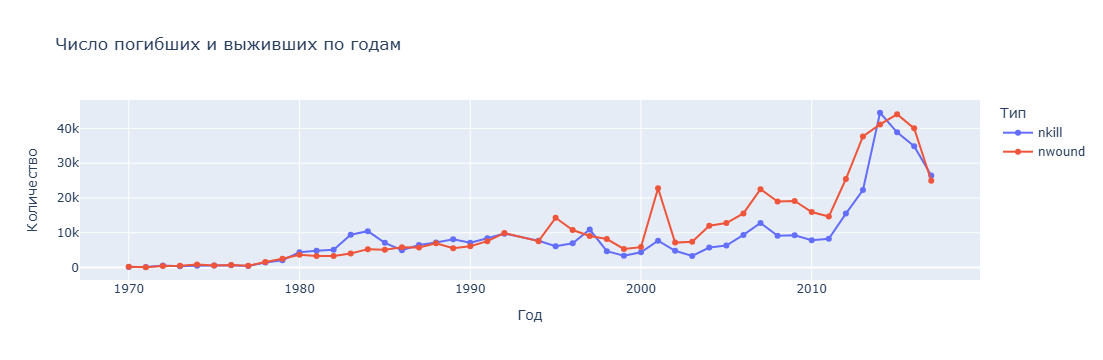

In [219]:
import plotly.express as px

# Группировка данных по годам и подсчет числа погибших и выживших
casualties = df.groupby('iyear')[['nkill', 'nwound']].sum().reset_index()

# Строим линейный график с двумя линиями
fig = px.line(casualties, x='iyear', y=['nkill', 'nwound'],
              title='Число погибших и выживших по годам',
              labels={'iyear': 'Год', 'value': 'Количество', 'variable': 'Тип'},
              markers=True)

# Отображаем график
fig.show()


In [231]:
import plotly.graph_objs as go

df2016 = df[df['iyear'] == 2016]

pie1 = df2016['nkill']  # Погибшие
pie2 = df2016['nwound']  # Выжившие

total_kills = pie1.sum()
total_wounds = pie2.sum()

labels = ['Погибшие', 'Выжившие']
values = [total_kills, total_wounds]

fig = {
  "data": [
    {
      "values": values,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Число погибших и выживших",
      "hoverinfo":"label+percent+name",
      "hole": .3,  # Для создания полукруга
      "type": "pie"
    },
  ],
  "layout": {
        "title":"Распределение погибших и выживших в 2016 году",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Число погибших и выживших",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}

fig = go.Figure(fig)
fig.show(renderer="colab")


In [233]:
# Загружаем данные
df = pd.read_csv('C:\\Users\\user\\Downloads\\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

# Группировка данных по годам для разных метрик
incidents_per_year = df.groupby('iyear').size().reset_index(name='total_incidents')
avg_kills_per_year = df.groupby('iyear')['nkill'].mean().reset_index(name='avg_kills')
avg_wounds_per_year = df.groupby('iyear')['nwound'].mean().reset_index(name='avg_wounds')
incidents_per_region = df.groupby('region_txt').size().reset_index(name='incidents_by_region')

# Создаем trace для каждого подграфика
#  Линейный график для общее количество инцидентов по годам.
trace1 = go.Scatter(
    x=incidents_per_year['iyear'],
    y=incidents_per_year['total_incidents'],
    name='Total Incidents',
    mode='lines+markers'
)
#  Линейный график для среднее количество погибших по годам.
trace2 = go.Scatter(
    x=avg_kills_per_year['iyear'],
    y=avg_kills_per_year['avg_kills'],
    xaxis='x2',
    yaxis='y2',
    name='Average Kills',
    mode='lines+markers'
)
#  Линейный график для среднее количество выживших по годам.
trace3 = go.Scatter(
    x=avg_wounds_per_year['iyear'],
    y=avg_wounds_per_year['avg_wounds'],
    xaxis='x3',
    yaxis='y3',
    name='Average Wounds',
    mode='lines+markers'
)
#  Гистограмма для количества инцидентов по регионам.
trace4 = go.Bar(
    x=incidents_per_region['region_txt'],
    y=incidents_per_region['incidents_by_region'],
    xaxis='x4',
    yaxis='y4',
    name='Incidents by Region'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title='Multiple Subplots for Terrorism Incidents Analysis',
    
    # xaxis и yaxis, чтобы указать расположение каждого подграфика.
    xaxis=dict(domain=[0, 0.45]),
    yaxis=dict(domain=[0, 0.45]),
    
    xaxis2=dict(domain=[0.55, 1], anchor='y2'),
    yaxis2=dict(domain=[0, 0.45], anchor='x2'),
    
    xaxis3=dict(domain=[0, 0.45], anchor='y3'),
    yaxis3=dict(domain=[0.55, 1], anchor='x3'),
    
    xaxis4=dict(domain=[0.55, 1], anchor='y4'),
    yaxis4=dict(domain=[0.55, 1], anchor='x4'),
    
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")